In [2]:
import networkx as nx
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import product
import glob
import matplotlib as mpl
def to_gset(gfile: str, g: nx.Graph):
    with open(gfile, mode='w') as gset:
        gset.write('{} {}\n'.format(g.number_of_nodes(), g.number_of_edges()))
        edgelist = g.edges()
        n = g.number_of_nodes()
        for u,v in g.edges():
            src = u[0] * 10 + u[1]
            dst = v[0] * 10 + v[1]
            gset.write('{} {} 1\n'.format(src, dst)) 
def from_gset(gfile: str):
    with open(gfile) as gset:
        vcount, ecount = gset.readline().strip().split()
        vcount = int(vcount)
        ecount = int(ecount)
        edgelist = []
        for line in gset.readlines():
            info = line.strip().split()
            if len(info) == 2:
                w = 1.0
            else:
                weighted = True
                w = float(info[2])
            u,v = [int(i) for i in info[:2]]
            edgelist.append((u,v,w))
        g = nx.Graph()
        g.add_weighted_edges_from(edgelist)
        return g


In [2]:
lattice = nx.lattice.grid_2d_graph(n=10, m=10, periodic=True)
lattice = lattice

In [3]:
def to_gset(gfile: str, g: nx.Graph):
    with open(gfile, mode='w') as gset:
        gset.write('{} {}\n'.format(g.number_of_nodes(), g.number_of_edges()))
        edgelist = g.edges()
        n = g.number_of_nodes()
        for u,v in g.edges():
            src = u[0] * 10 + u[1]
            dst = v[0] * 10 + v[1]
            gset.write('{} {} 1\n'.format(src, dst)) 
def from_gset(gfile: str):
    with open(gfile) as gset:
        vcount, ecount = gset.readline().strip().split()
        vcount = int(vcount)
        ecount = int(ecount)
        edgelist = []
        for line in gset.readlines():
            info = line.strip().split()
            if len(info) == 2:
                w = 1.0
            else:
                weighted = True
                w = float(info[2])
            u,v = [int(i) for i in info[:2]]
            edgelist.append((u,v,w))
        g = nx.Graph()
        g.add_weighted_edges_from(edgelist)
        return g


In [4]:

to_gset('../lattice_2d.gset', lattice)


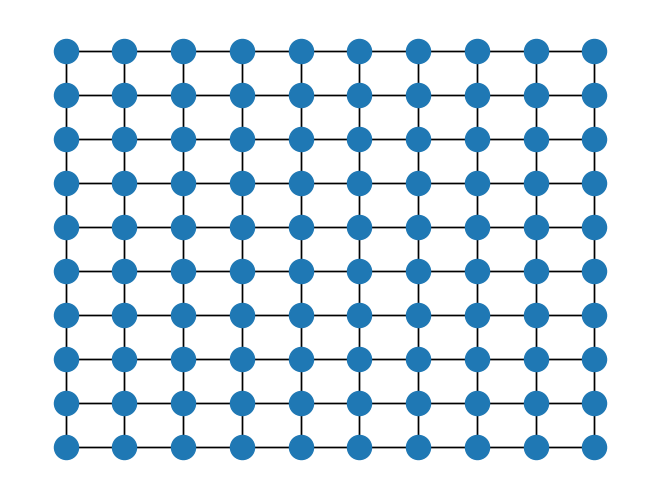

In [5]:
layout = dict([i, i] for i in lattice.nodes)
nx.draw(lattice, layout)
# print(lattice.nodes)

In [6]:
# layout = dict([(i*10+j,(i,j)) for (i,j), _ in layout.items()])
nx.draw(l2, layout)
# print(lattice.nodes)
l2 == lattice

NameError: name 'l2' is not defined

In [7]:
files = [os.path.abspath('../data/'+i) for i in os.listdir('../data')]
dflist = [pd.read_csv(i) for i in files]
df = pd.concat(dflist)
df

FileNotFoundError: [Errno 2] No such file or directory: '../data'

In [8]:
mean_df = df.groupby('beta').mean().reset_index()

NameError: name 'df' is not defined

In [52]:
mean_df['$\sqrt{M}$'] = np.sqrt(mean_df['M'])

In [142]:
ax=sns.lineplot(data=mean_df, x='beta', y='$\sqrt{M}$')
ax.set_ylabel('RMS')

NameError: name 'mean_df' is not defined

<AxesSubplot: xlabel='beta', ylabel='ene'>

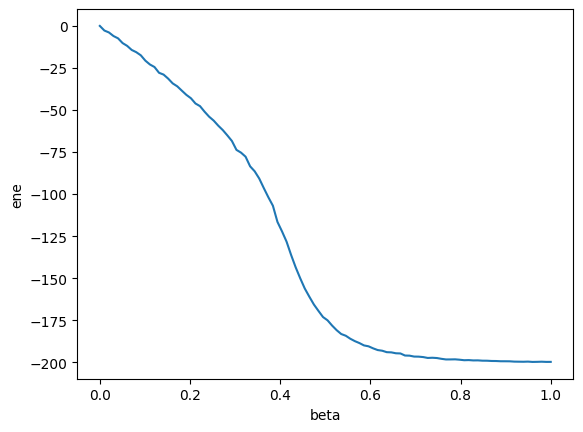

In [55]:
sns.lineplot(data=mean_df, x='beta', y='ene')

In [56]:
# df.to_csv('full_active_2d.csv', index=False)

In [27]:
df40_5 = pd.read_csv('../rank40.csv')
df40_5['Active Epochs'] = 5
df40_5['Active'] = 40
df40_100 = pd.read_csv('../rank40_100.csv')
df40_100['Active Epochs'] = 100
df40_100['Active'] = 40

df60_5 = pd.read_csv('../rank60.csv')
df60_5['Active Epochs'] = 5
df60_5['Active'] = 60
df60_100 = pd.read_csv('../rank60_100.csv')
df60_100['Active Epochs'] = 100
df60_100['Active'] = 60

df80_5 = pd.read_csv('../rank80.csv')
df80_5['Active Epochs'] = 5
df80_5['Active'] = 80
df80_100 = pd.read_csv('../rank80_100.csv')
df80_100['Active Epochs'] = 100
df80_100['Active'] = 80

df100 = pd.read_csv('../rank100.csv')
df100 = df100.rename(columns=dict([(i, i+'_100') for i in df100.columns if i!='beta']))
df100['Active Epochs'] = 1
df100['Active'] = 100

In [77]:
comp_df = pd.concat([df40_5, df40_100,
                     df60_5, df60_100,
                     df80_5, df80_100,
                     df100]).reset_index().drop(columns=['index'])
hue = comp_df['Active'].astype(str) + ', ' + comp_df['Active Epochs'].astype(str)

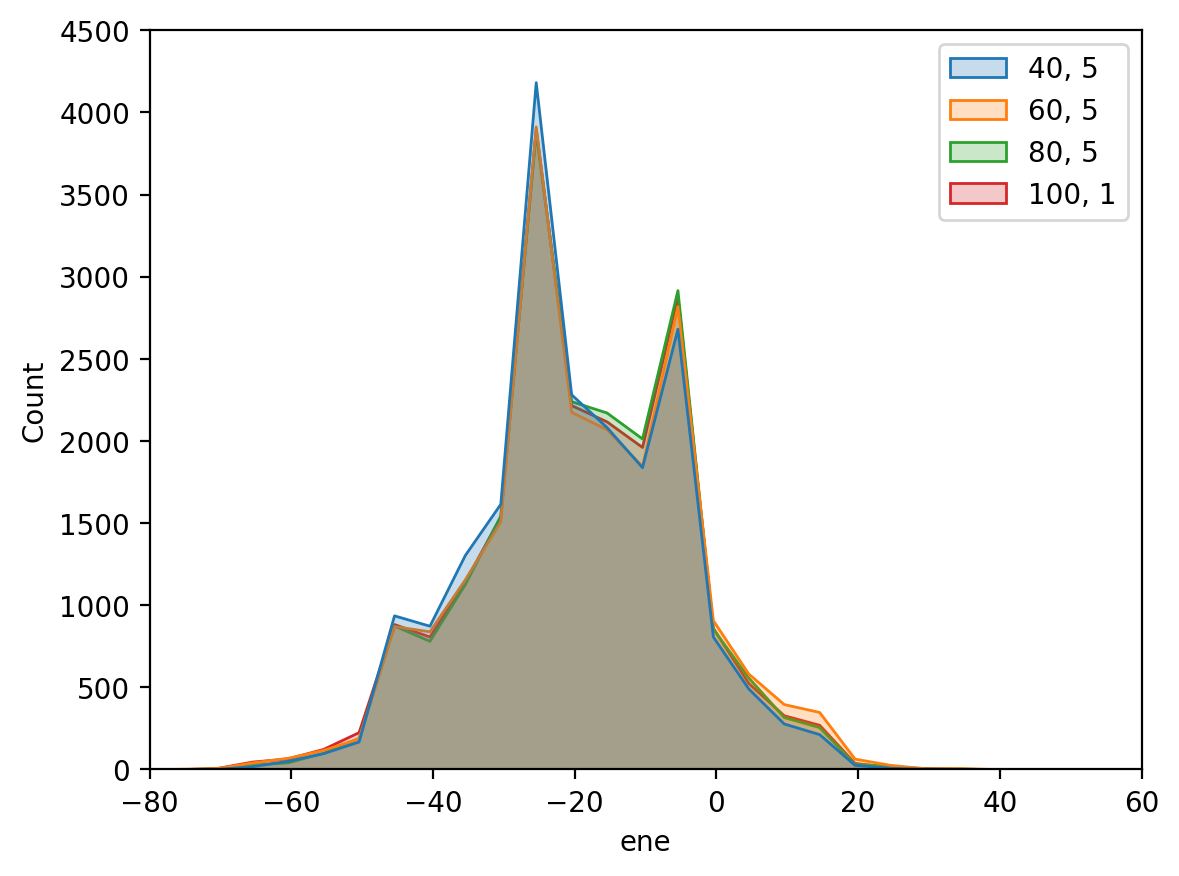

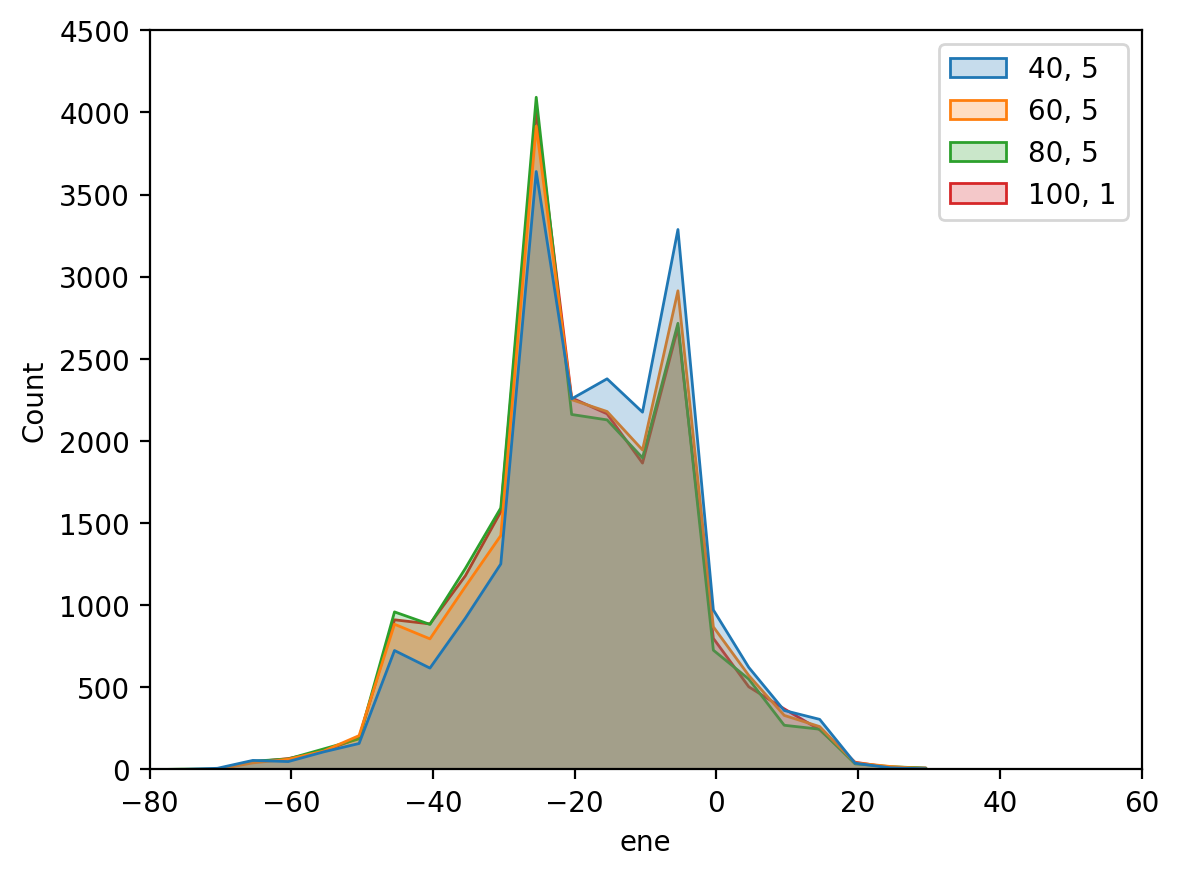

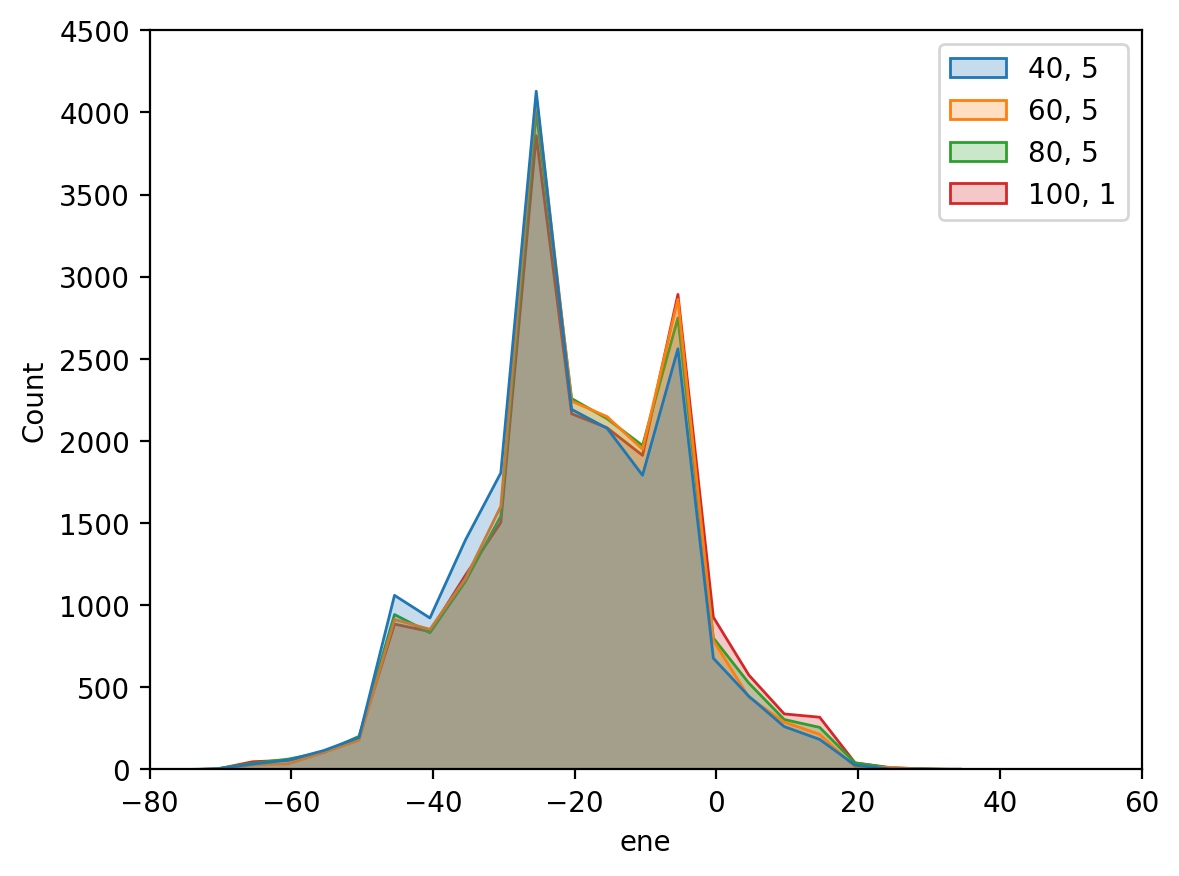

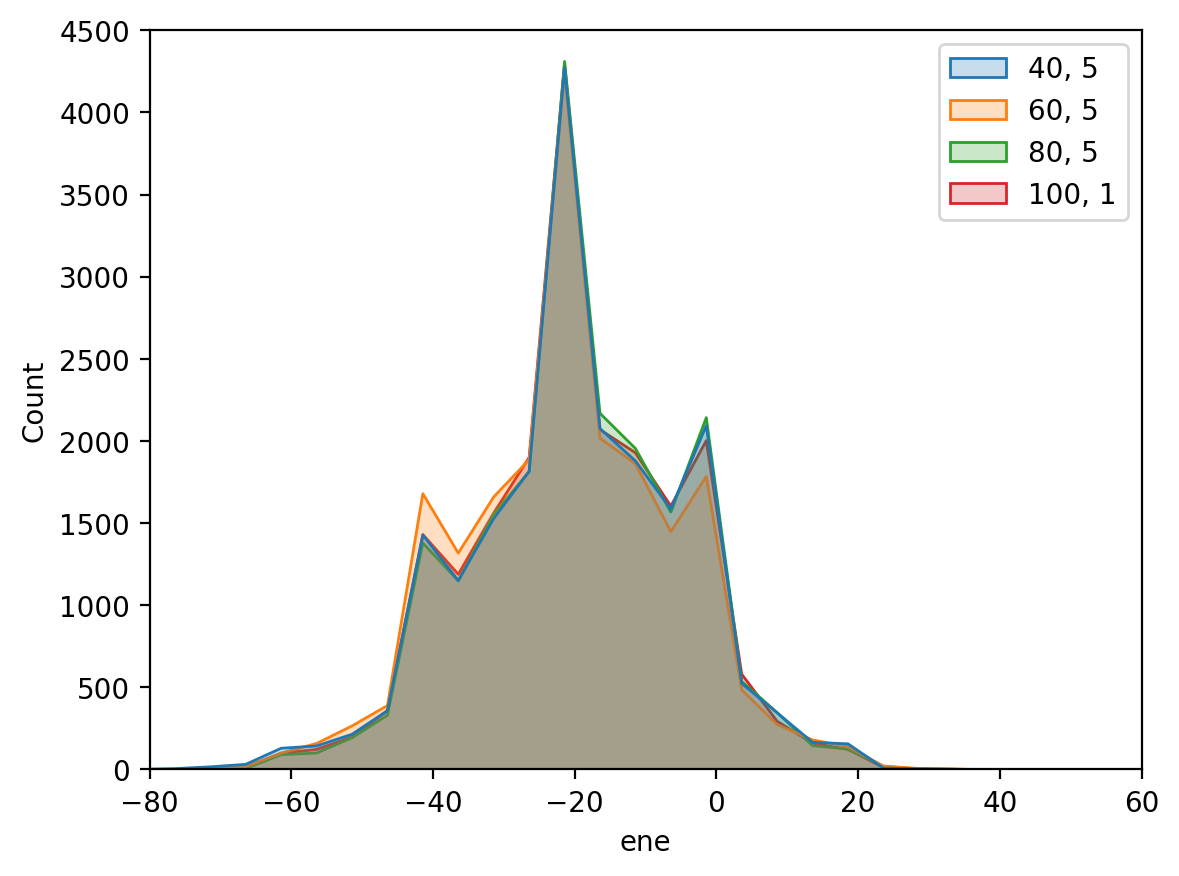

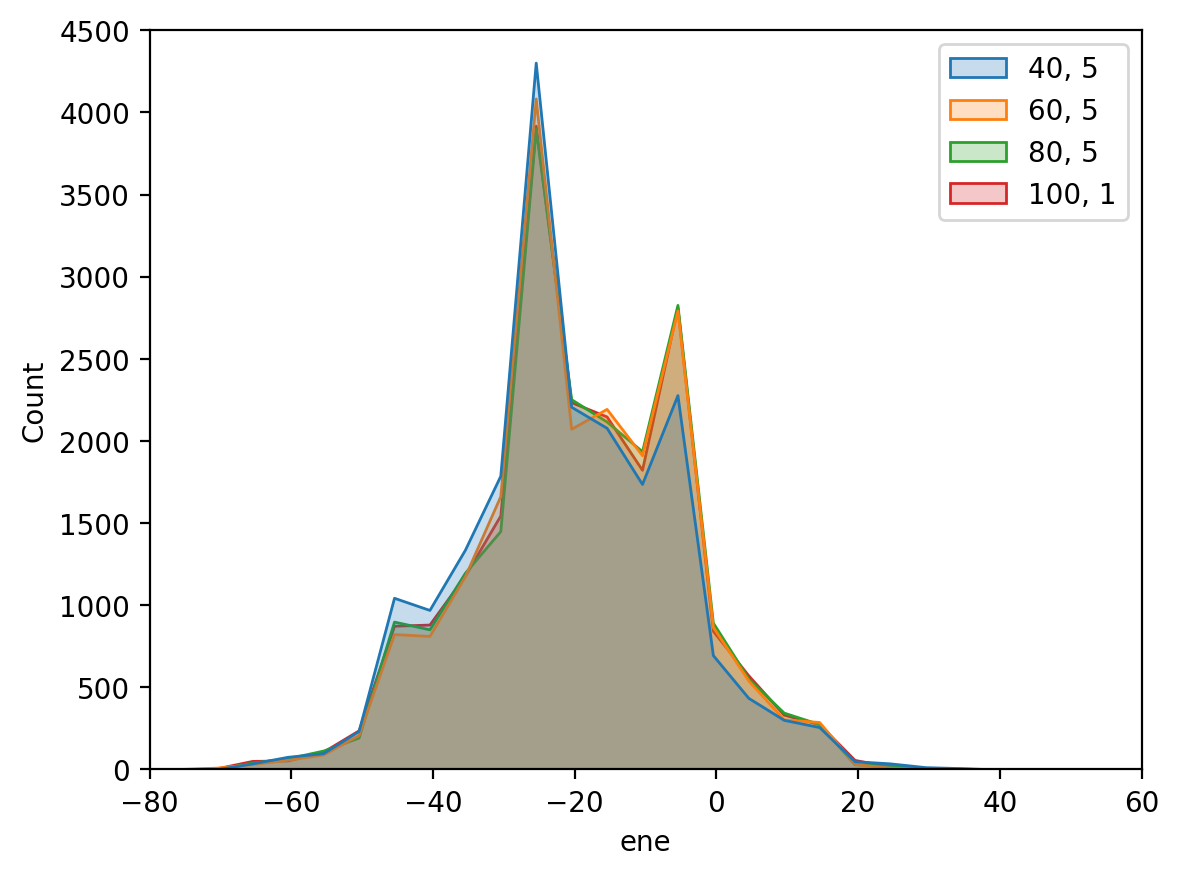

In [78]:
tuplist = [
    (1, 100),
    (5, 40),
    (100, 40),
    (5, 60),
    (100, 60),
    (5, 80),
    (100, 80)
]
# for ae, a in tuplist:
    # qdf = comp_df.query(f'`Active Epochs`=={ae} and Active=={a}')
# os.mkdir(f'ae_{ae}_a_{a}_distfigs')
maxep = comp_df['epoch'].max()
step = 20000
qdf = comp_df.query('`Active Epochs` == 5 or `Active Epochs` == 1')
hue = qdf['Active'].astype(str) + ', ' + qdf['Active Epochs'].astype(str)
for i in range(0, 100001-step, step):
    fig, ax = plt.subplots(dpi=200)
    lim_df = qdf.query(f'epoch >= {i} and epoch < {i+step}')
    sns.histplot(ax=ax,data=lim_df, x='ene', binwidth=5, hue=hue, element='poly')
    ax.set_xlim(-80, 60)
    ax.set_ylim(0, 4500)
    plt.show()
    
    # ax.set_title(f'2D Ising')



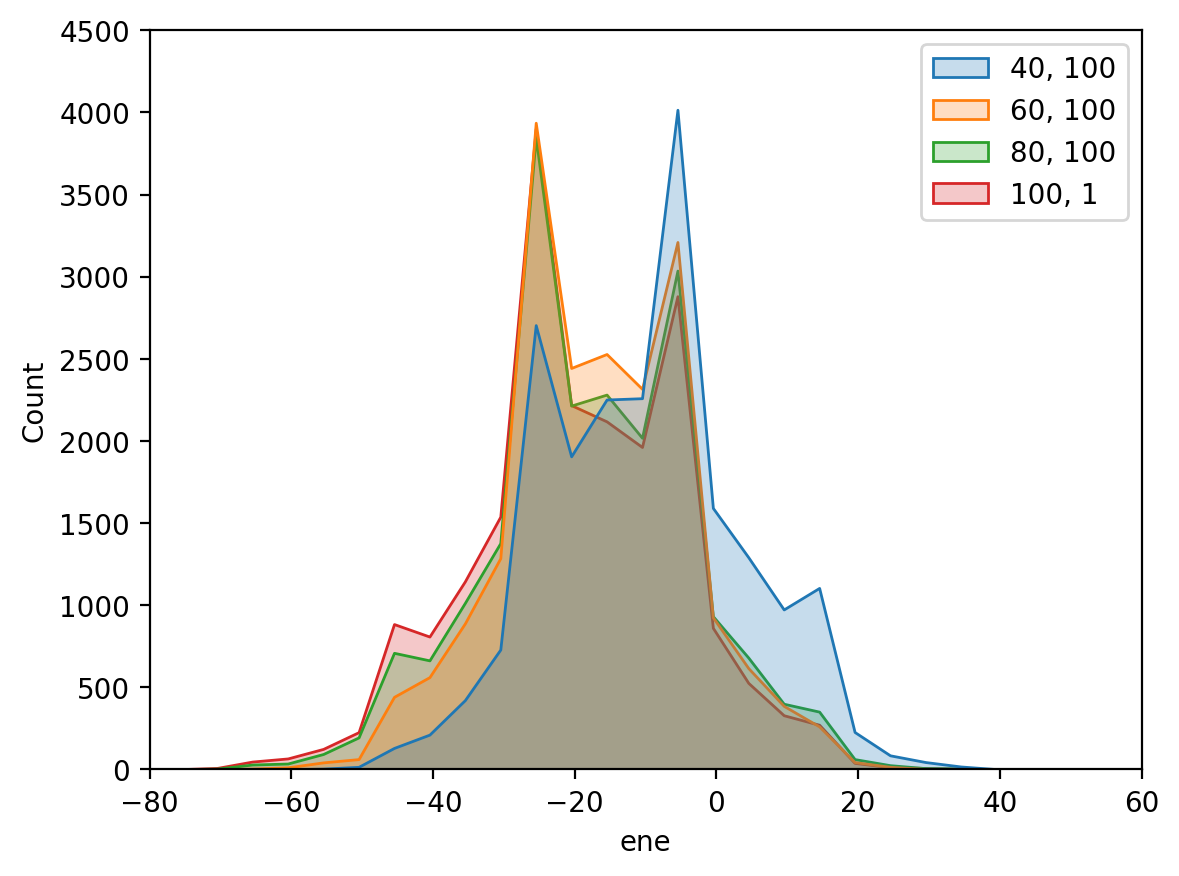

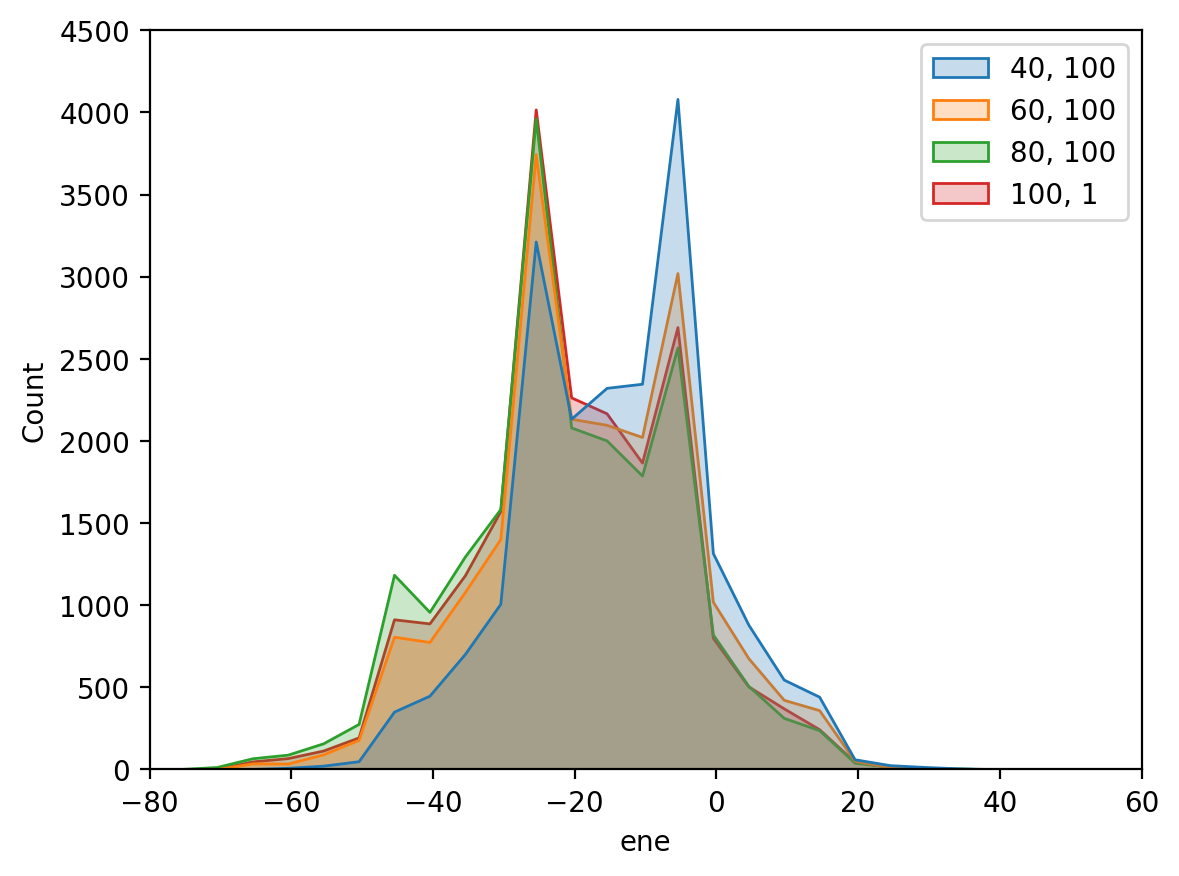

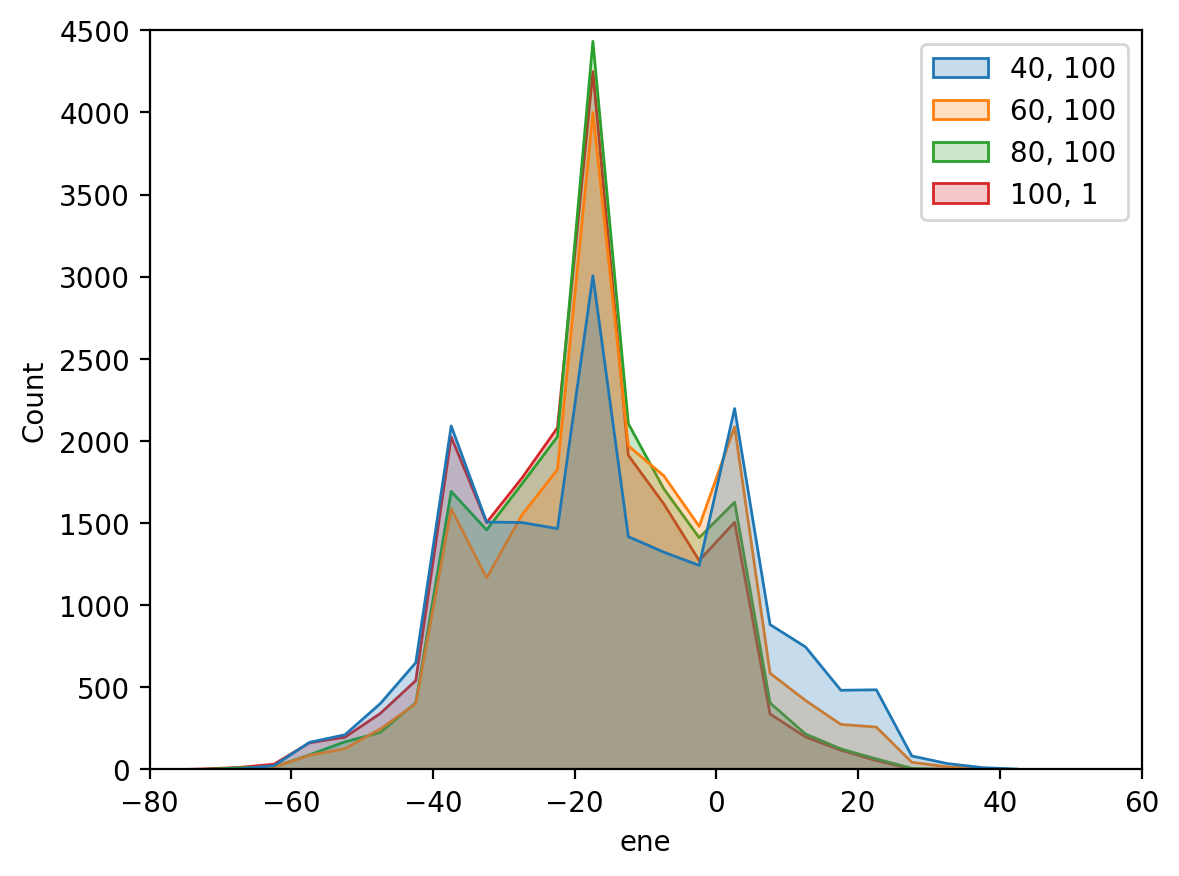

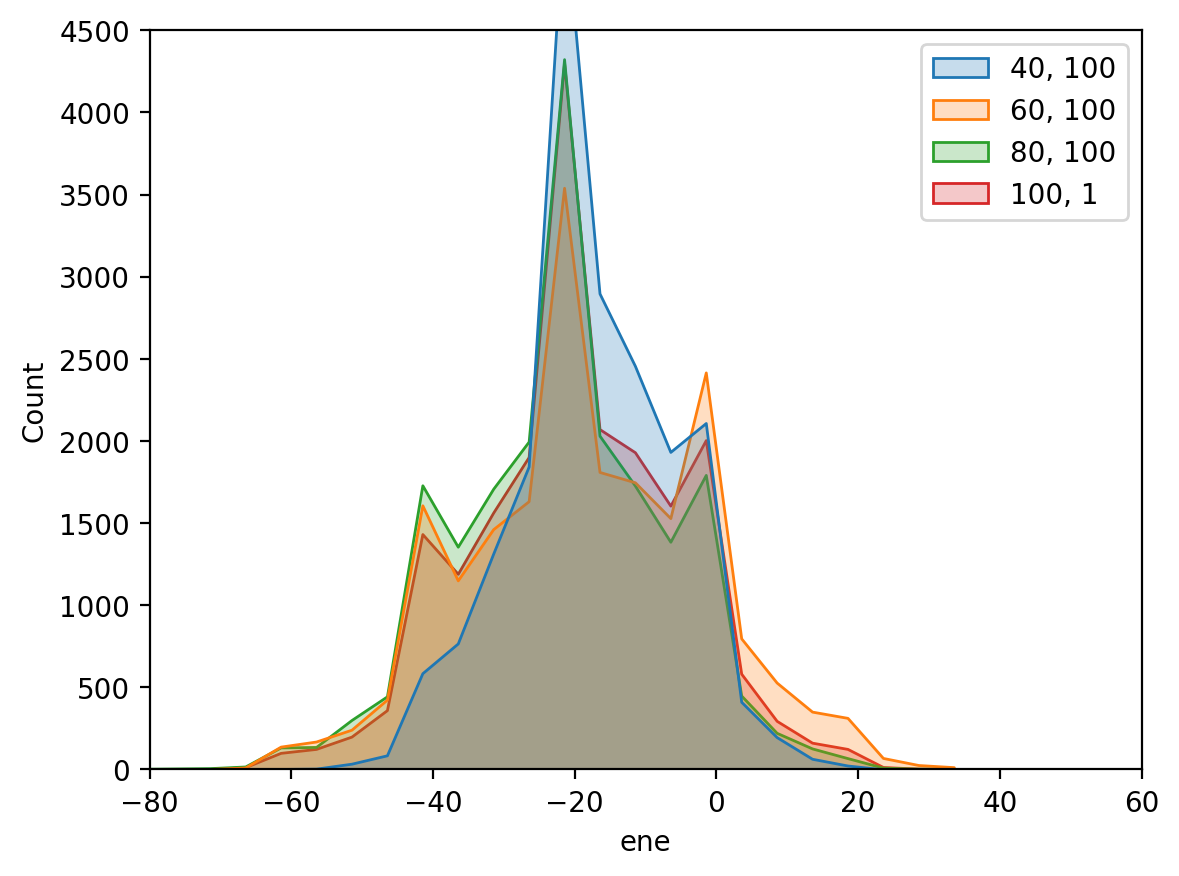

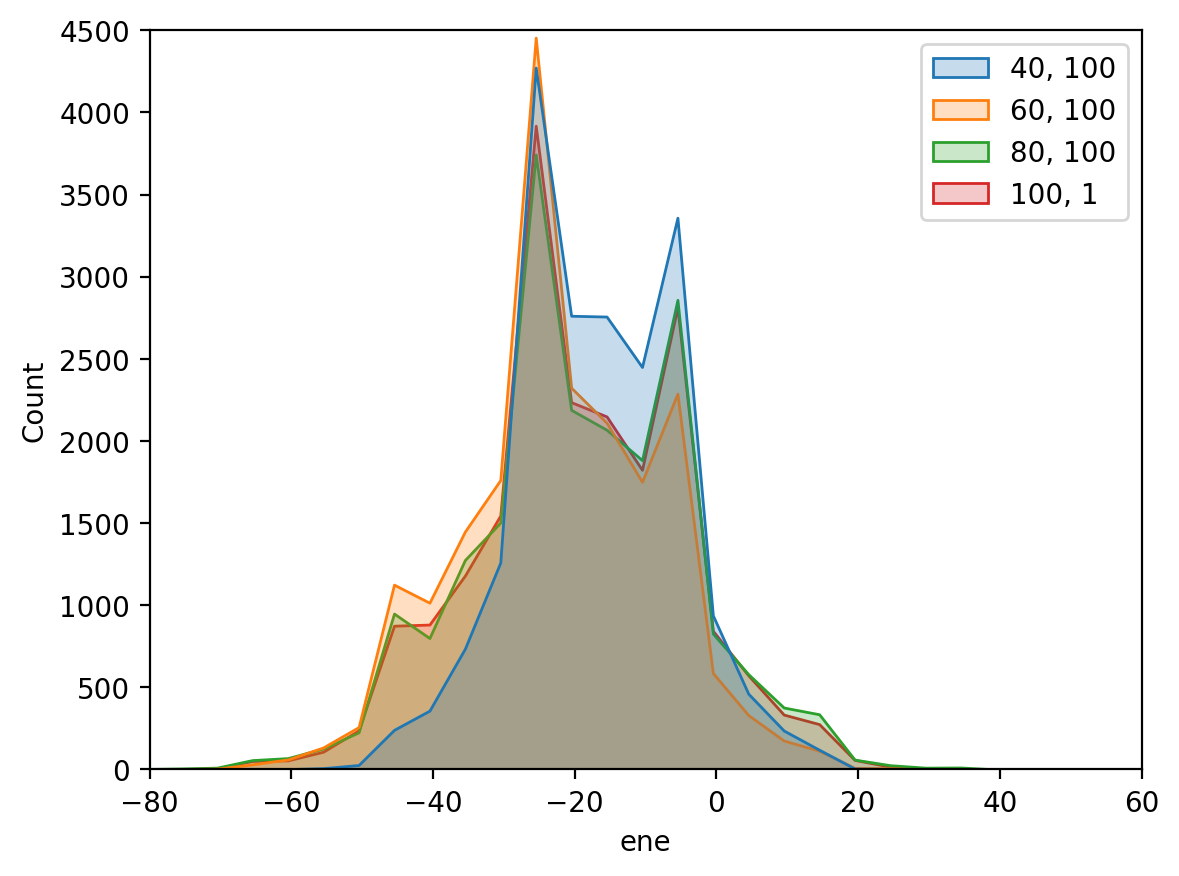

In [79]:
tuplist = [
    (1, 100),
    (5, 40),
    (100, 40),
    (5, 60),
    (100, 60),
    (5, 80),
    (100, 80)
]
# for ae, a in tuplist:
    # qdf = comp_df.query(f'`Active Epochs`=={ae} and Active=={a}')
# os.mkdir(f'ae_{ae}_a_{a}_distfigs')
maxep = comp_df['epoch'].max()
step = 20000
qdf = comp_df.query('`Active Epochs` == 100 or `Active Epochs` == 1')
hue = qdf['Active'].astype(str) + ', ' + qdf['Active Epochs'].astype(str)
for i in range(0, 100001-step, step):
    fig, ax = plt.subplots(dpi=200)
    lim_df = qdf.query(f'epoch >= {i} and epoch < {i+step}')
    sns.histplot(ax=ax,data=lim_df, x='ene', binwidth=5, hue=hue, element='poly')
    ax.set_xlim(-80, 60)
    ax.set_ylim(0, 4500)
    plt.show()
    
    # ax.set_title(f'2D Ising')



In [9]:
analysis_df = pd.concat([df40_5, df40_100,
                     df60_5, df60_100,
                     df80_5, df80_100,
                     df100], axis=1,
                     keys=['40_5', '40_100', '60_5', '60_100', '80_5', '80_100', '100'], 
                     )
bins = np.arange(-80, 60)
iterset = set(analysis_df.columns.get_level_values(0))
iterset.remove('100')
rmslist = []
for e in range(0, int(1e6+1)-step, step):
    dfref = analysis_df['100'].query(f'epoch >= {e} and epoch < {e+step}')
    distref = np.histogram(dfref['ene'], bins=bins)
    denom = distref[0]
    denom[denom == 0] = 1
    for i in iterset:
        dfi = analysis_df[i].query(f'epoch >= {e} and epoch < {e+step}')
        disti = np.histogram(dfi['ene'].to_list(), bins=bins)
        rms = np.mean(np.sqrt(np.power((distref[0]-disti[0])/denom, 2)) / len(disti))
        rmslist.append((e, e+step,i, rms))

NameError: name 'df40_5' is not defined

In [126]:
errdf = pd.DataFrame.from_records(rmslist, columns=['epoch_start', 'epoch_end', 'active_active-epochs', 'energy_dist_rms'])

<Axes: xlabel='epoch_start', ylabel='energy_dist_rms'>

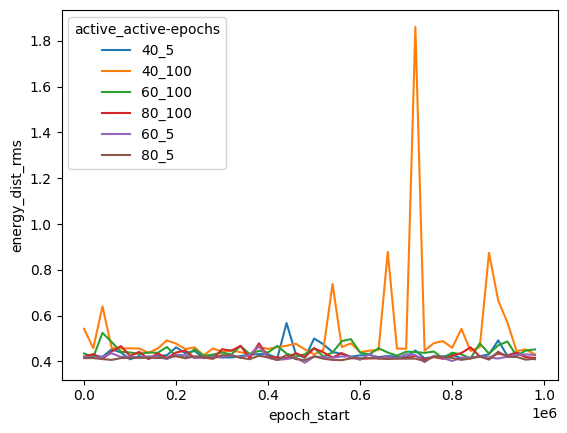

In [128]:
sns.lineplot(data=errdf, x='epoch_start', y='energy_dist_rms', hue='active_active-epochs')

In [24]:
activelist = [0, 50]
betalist = [0.1, 0.5, 0.9]
ae = [1, 5, 10]
burnin = 5000
fulldf = pd.concat([pd.concat([pd.read_csv(i).iloc[burnin:].reset_index(drop=True) for i in glob.glob(f'../beta_{b:.1f}_e15000/active_0_*')]) for b in betalist], keys=betalist, axis=1)
dfpartlist = dict([(b, dict([(ep, pd.concat([pd.read_csv(i).iloc[burnin:].reset_index(drop=True) for i in glob.glob(f'../beta_{b:.1f}_e15000/active_50_ae_{ae}*')])) for ep in ae]))
                            for b in betalist])

In [25]:
betalist = []
betadflist = []
for beta, bdict in dfpartlist.items():
    bdf = pd.concat([v for v in bdict.values()], keys=[k for k in bdict.keys()], axis=1)
    betalist.append(beta)
    betadflist.append(bdf)
partdf = pd.concat(betadflist, keys=betalist, axis=1)

In [26]:
bounds = dict([(beta, (np.min(partdf[beta][5]['ene']), np.max(partdf[beta][5]['ene']))) for beta in betalist])

In [27]:
for beta in [0.1, 0.5, 0.9]:
    print(np.sqrt(np.mean(fulldf[beta]['M'])), np.sqrt(np.mean(partdf[beta][1]['M'])), np.sqrt(np.mean(partdf[beta][5]['M'])), np.sqrt(np.mean(partdf[beta][10]['M'])))

0.12493167092454978 0.1253391144056794 0.1253391144056794 0.1253391144056794
0.9154704220235627 0.9163219362938627 0.9163219362938627 0.9163219362938627
0.9983405899791914 0.9982882020739301 0.9982882020739301 0.9982882020739301


In [28]:
b = 0.1
epochs = 1500
ep = 1
len(glob.glob(f'../beta_{b:.1f}_e{epochs}/active_50_ae_{ep}*'))

100

In [29]:
def get_sa_info(active, betalist, ae, burnin, epochs, maxepoch=-1):
    if maxepoch == -1:
        fulldf = pd.concat([pd.concat([pd.read_csv(i).iloc[burnin:].reset_index(drop=True) for i in glob.glob(f'../beta_{b:.1f}_e{epochs}/active_0_*')]) for b in betalist], keys=betalist, axis=1)
        dfpartlist = dict([(b, dict([(ep, pd.concat([pd.read_csv(i).iloc[burnin:].reset_index(drop=True) for i in glob.glob(f'../beta_{b:.1f}_e{epochs}/active_{active}_ae_{ep}_*')])) for ep in ae]))
                                    for b in betalist])
    else:
        fulldf = pd.concat([pd.concat([pd.read_csv(i).iloc[burnin:maxepoch].reset_index(drop=True) for i in glob.glob(f'../beta_{b:.1f}_e{epochs}/active_0_*')]) for b in betalist], keys=betalist, axis=1)
        dfpartlist = dict([(b, dict([(ep, pd.concat([pd.read_csv(i).iloc[burnin:maxepoch].reset_index(drop=True) for i in glob.glob(f'../beta_{b:.1f}_e{epochs}/active_{active}_ae_{ep}_*')])) for ep in ae]))
                                    for b in betalist])
    betalist = []
    betadflist = []
    for beta, bdict in dfpartlist.items():
        reference = fulldf[beta].copy()
        reference['active'] = 100
        dlist = []
        for k,v in bdict.items():
            v['active'] = 50
            v = pd.concat([v, reference])
            dlist.append(v)
        bdf = pd.concat(dlist, keys=[k for k in bdict.keys()], axis=1)
        betalist.append(beta)
        betadflist.append(bdf)
    partdf = pd.concat(betadflist, keys=betalist, axis=1)
    return fulldf, partdf


In [30]:
def plot_distributions(partdf:pd.DataFrame, min_epoch=None, max_epoch=None, outname=None):   
    bounds = dict([(beta, (np.min(partdf[beta][10]['ene']), np.max(partdf[beta][10]['ene']))) for beta in betalist])
    if min_epoch is None:
        min_epoch = 0
    if max_epoch is None:
        max_epoch = 1e10
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(17, 16), dpi=200)
    beta = list(set(partdf.columns.get_level_values(0)))
    beta = sorted(beta)
    active_epochs = list(set(partdf.columns.get_level_values(1)))
    active_epochs = sorted(active_epochs)
    for beta, axlist in zip(beta, axs):
        for ax, ep in zip(axlist, active_epochs):
            lim_df = partdf[beta][ep].query(f'epoch >= {min_epoch} and epoch < {max_epoch}')
            sns.histplot(ax=ax, data=lim_df, x='ene',hue='active',element='step', binwidth=2, palette=sns.color_palette('tab10', 2))
            ax.set_xlim(bounds[beta])
            ax.set_yscale('log' if beta == 0.9 else 'linear')
            ax.set_title('Beta {}, TSwap {}'.format(beta, ep), fontsize=18)
            ax.set_xlabel('Energy')
    fig.suptitle(f'Epochs: {min_epoch}-{max_epoch}', y=0.93, fontsize=24)
    plt.close()
    if outname is not None:
        fig.savefig(outname, dpi=200)
# plot_distributions(part_1500)

In [31]:
full_15000, part_15000 = get_sa_info(50, [0.1, 0.5, 0.9], [1,5,10], 0, 15000)
# full_1500, part_1500 = get_sa_info(50, [0.1, 0.5, 0.9], [1,5,10], 500, 15000, 1500)
# full_150, part_150 = get_sa_info(50, [0.1, 0.5, 0.9], [1,5,10], 50, 15000, 150)

for i in range(0, 15000, 1000):
    print(i, i+100)
    plot_distributions(part_15000, i, i+1000, f'../window_figs_1000/epoch_window_{i}_{i+1000}.png')



0 100
100 200
200 300
300 400
400 500
500 600
600 700


KeyboardInterrupt: 

<Figure size 3400x3200 with 0 Axes>

In [32]:
def get_rmse(partdf:pd.DataFrame, min_epoch=None, max_epoch=None):  
    bounds = dict([(beta, (np.min(partdf[beta][10]['ene']), np.max(partdf[beta][10]['ene']))) for beta in betalist])
    if min_epoch is None:
        min_epoch = 0
    if max_epoch is None:
        max_epoch = 1e10
    beta = list(set(partdf.columns.get_level_values(0)))
    beta = sorted(beta)
    active_epochs = list(set(partdf.columns.get_level_values(1)))
    active_epochs = sorted(active_epochs)
    result_list = []
    for b in beta:
        bins = np.arange(bounds[b][0], bounds[b][1], 2)
        for ep in active_epochs:
            lim_df = partdf[b][ep].query(f'epoch >= {min_epoch} and epoch < {max_epoch}')
            reflim_df = lim_df.query('active==100')
            complim_df = lim_df.query('active==50')
            refhist = np.histogram(reflim_df['ene'], bins=bins)[0]
            comphist = np.histogram(complim_df['ene'], bins=bins)[0]
            rmse = np.sqrt(np.mean(
                np.power( (comphist - refhist) , 2)))
            result_list.append((b, ep, min_epoch, max_epoch,  rmse))
    return pd.DataFrame.from_records(result_list, columns=['beta', 'tswap', 'min_epoch', 'max_epoch', 'RMSE'])

In [39]:
dflist = []
for i in range(0, 15000, 1000):
    dflist.append(get_rmse(part_15000, i, i+1000))


In [40]:
rmsedf = pd.concat(dflist).reset_index(drop=True)

/tmp/ipykernel_39939/1628458022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['Sweep'] = lim_df['min_epoch'] / (100 * lim_df['tswap'])


<Axes: xlabel='Sweep', ylabel='RMSE'>

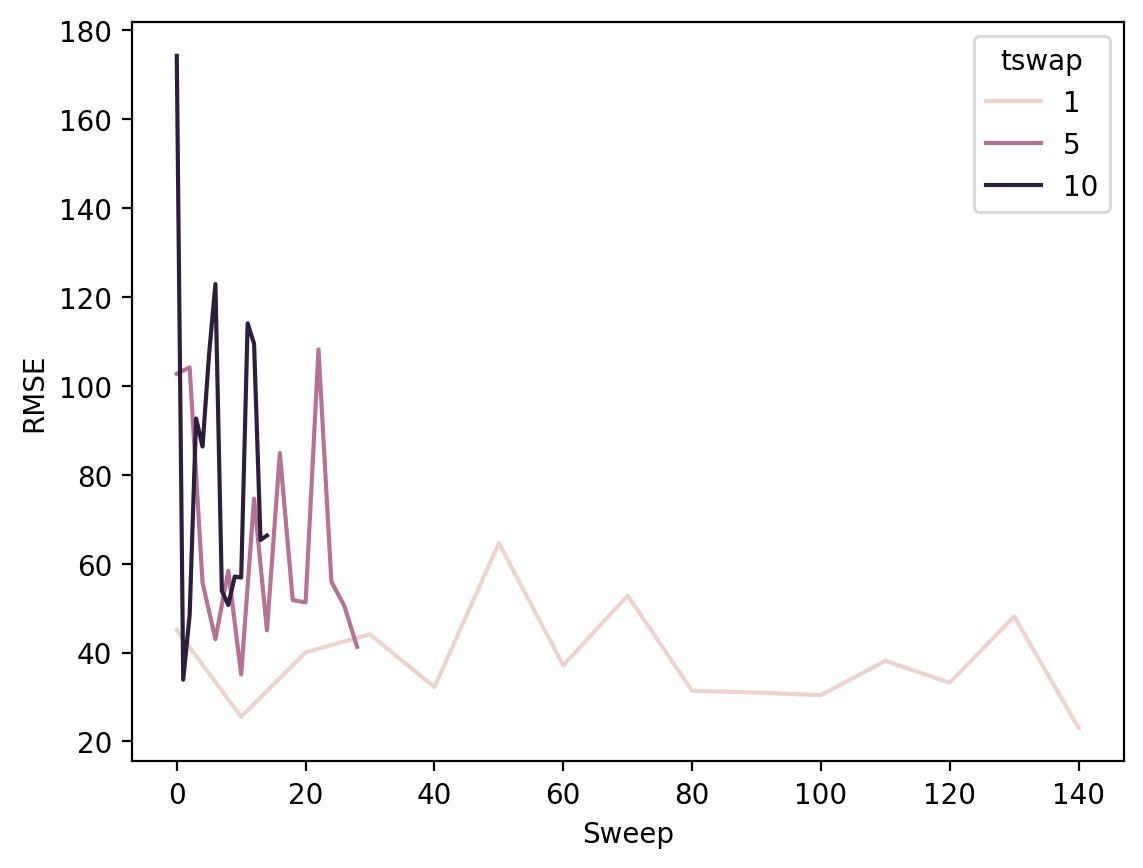

In [41]:
lim_df = rmsedf.query('beta==0.1')
lim_df['Sweep'] = lim_df['min_epoch'] / (100 * lim_df['tswap'])
hue = lim_df['beta'].astype(str) + ', ' + lim_df['tswap'].astype(str)
fig, ax = plt.subplots(dpi=200)
sns.lineplot(ax=ax,data=lim_df, x='Sweep', y='RMSE', hue='tswap')
# e

/tmp/ipykernel_39939/1550288623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['Sweep'] = lim_df['min_epoch'] / (100 * lim_df['tswap'])


<Axes: xlabel='Sweep', ylabel='RMSE'>

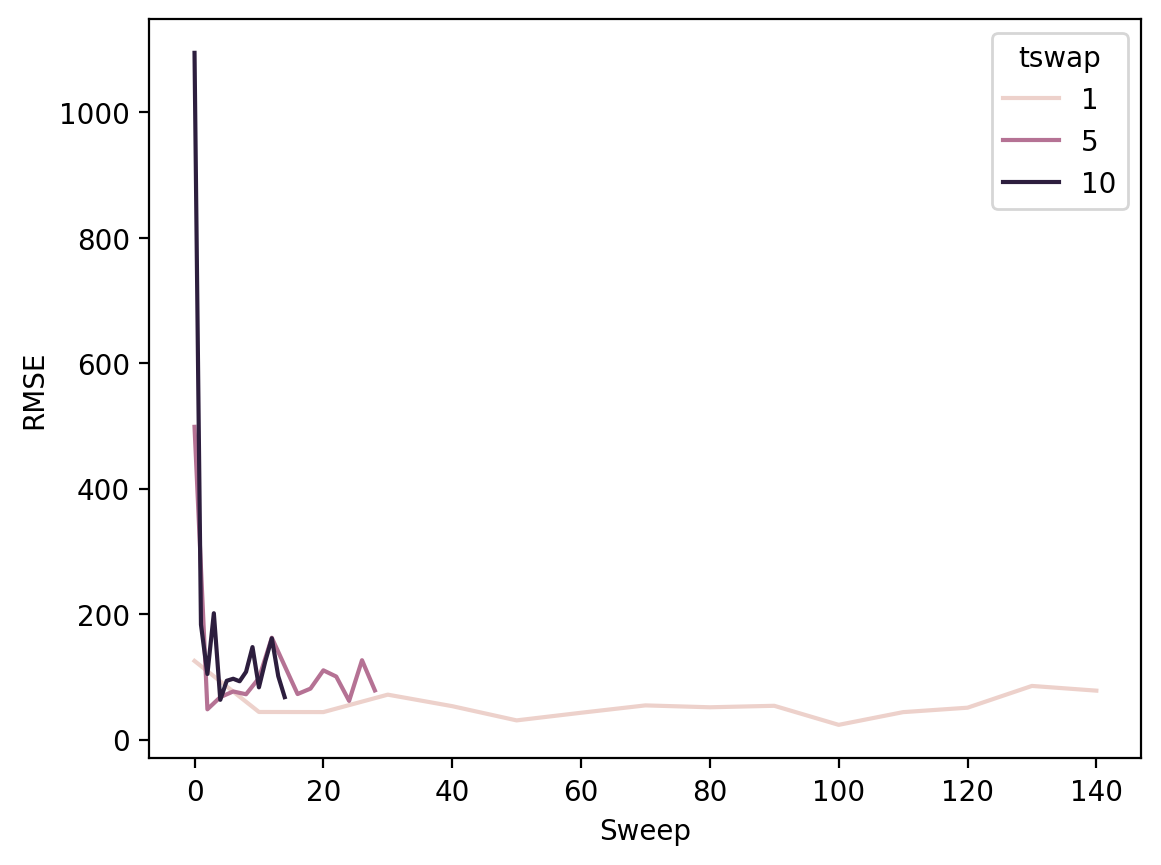

In [42]:
lim_df = rmsedf.query('beta==0.5')
lim_df['Sweep'] = lim_df['min_epoch'] / (100 * lim_df['tswap'])
hue = lim_df['beta'].astype(str) + ', ' + lim_df['tswap'].astype(str)
fig, ax = plt.subplots(dpi=200)
sns.lineplot(ax=ax,data=lim_df, x='Sweep', y='RMSE', hue='tswap')
# e

/tmp/ipykernel_39939/901628967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['Sweep'] = lim_df['min_epoch'] / (100 * lim_df['tswap'])


<Axes: xlabel='Sweep', ylabel='RMSE'>

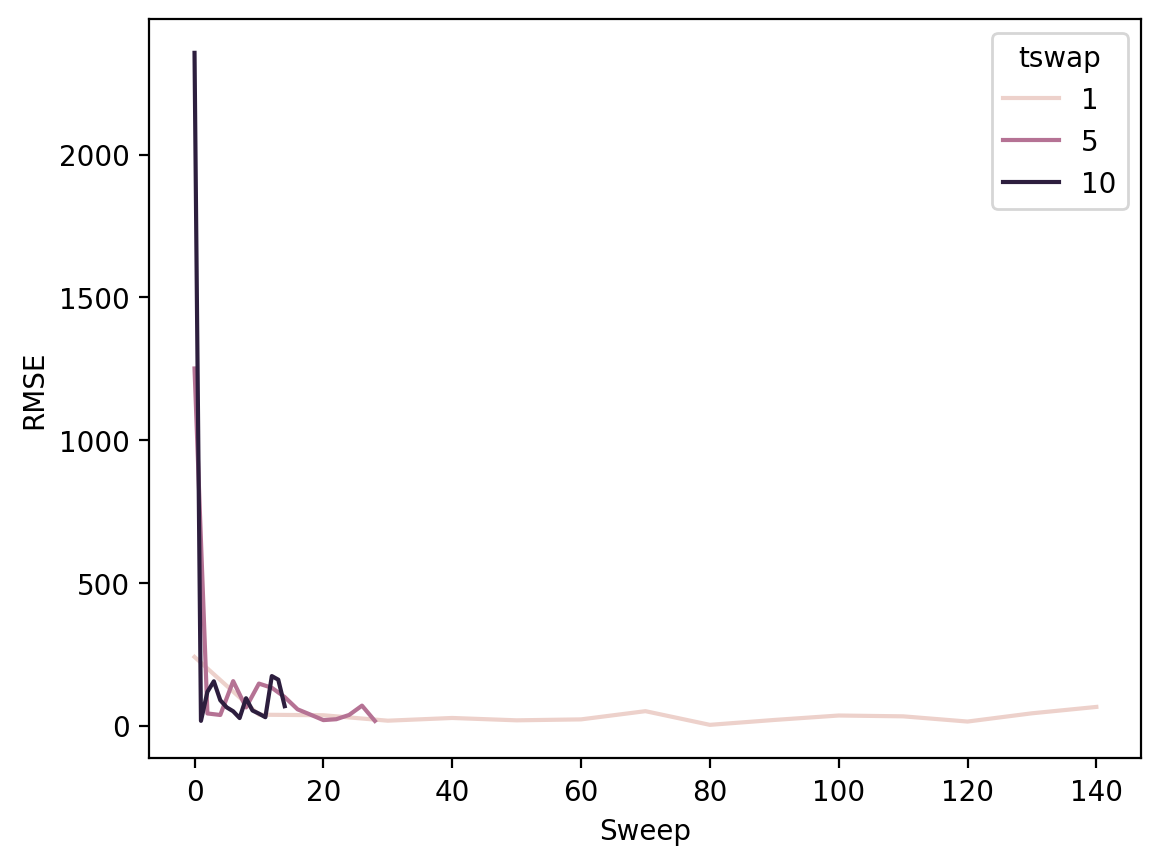

In [43]:
lim_df = rmsedf.query('beta==0.9')
lim_df['Sweep'] = lim_df['min_epoch'] / (100 * lim_df['tswap'])
hue = lim_df['beta'].astype(str) + ', ' + lim_df['tswap'].astype(str)
fig, ax = plt.subplots(dpi=200)
sns.lineplot(ax=ax,data=lim_df, x='Sweep', y='RMSE', hue='tswap')
# e

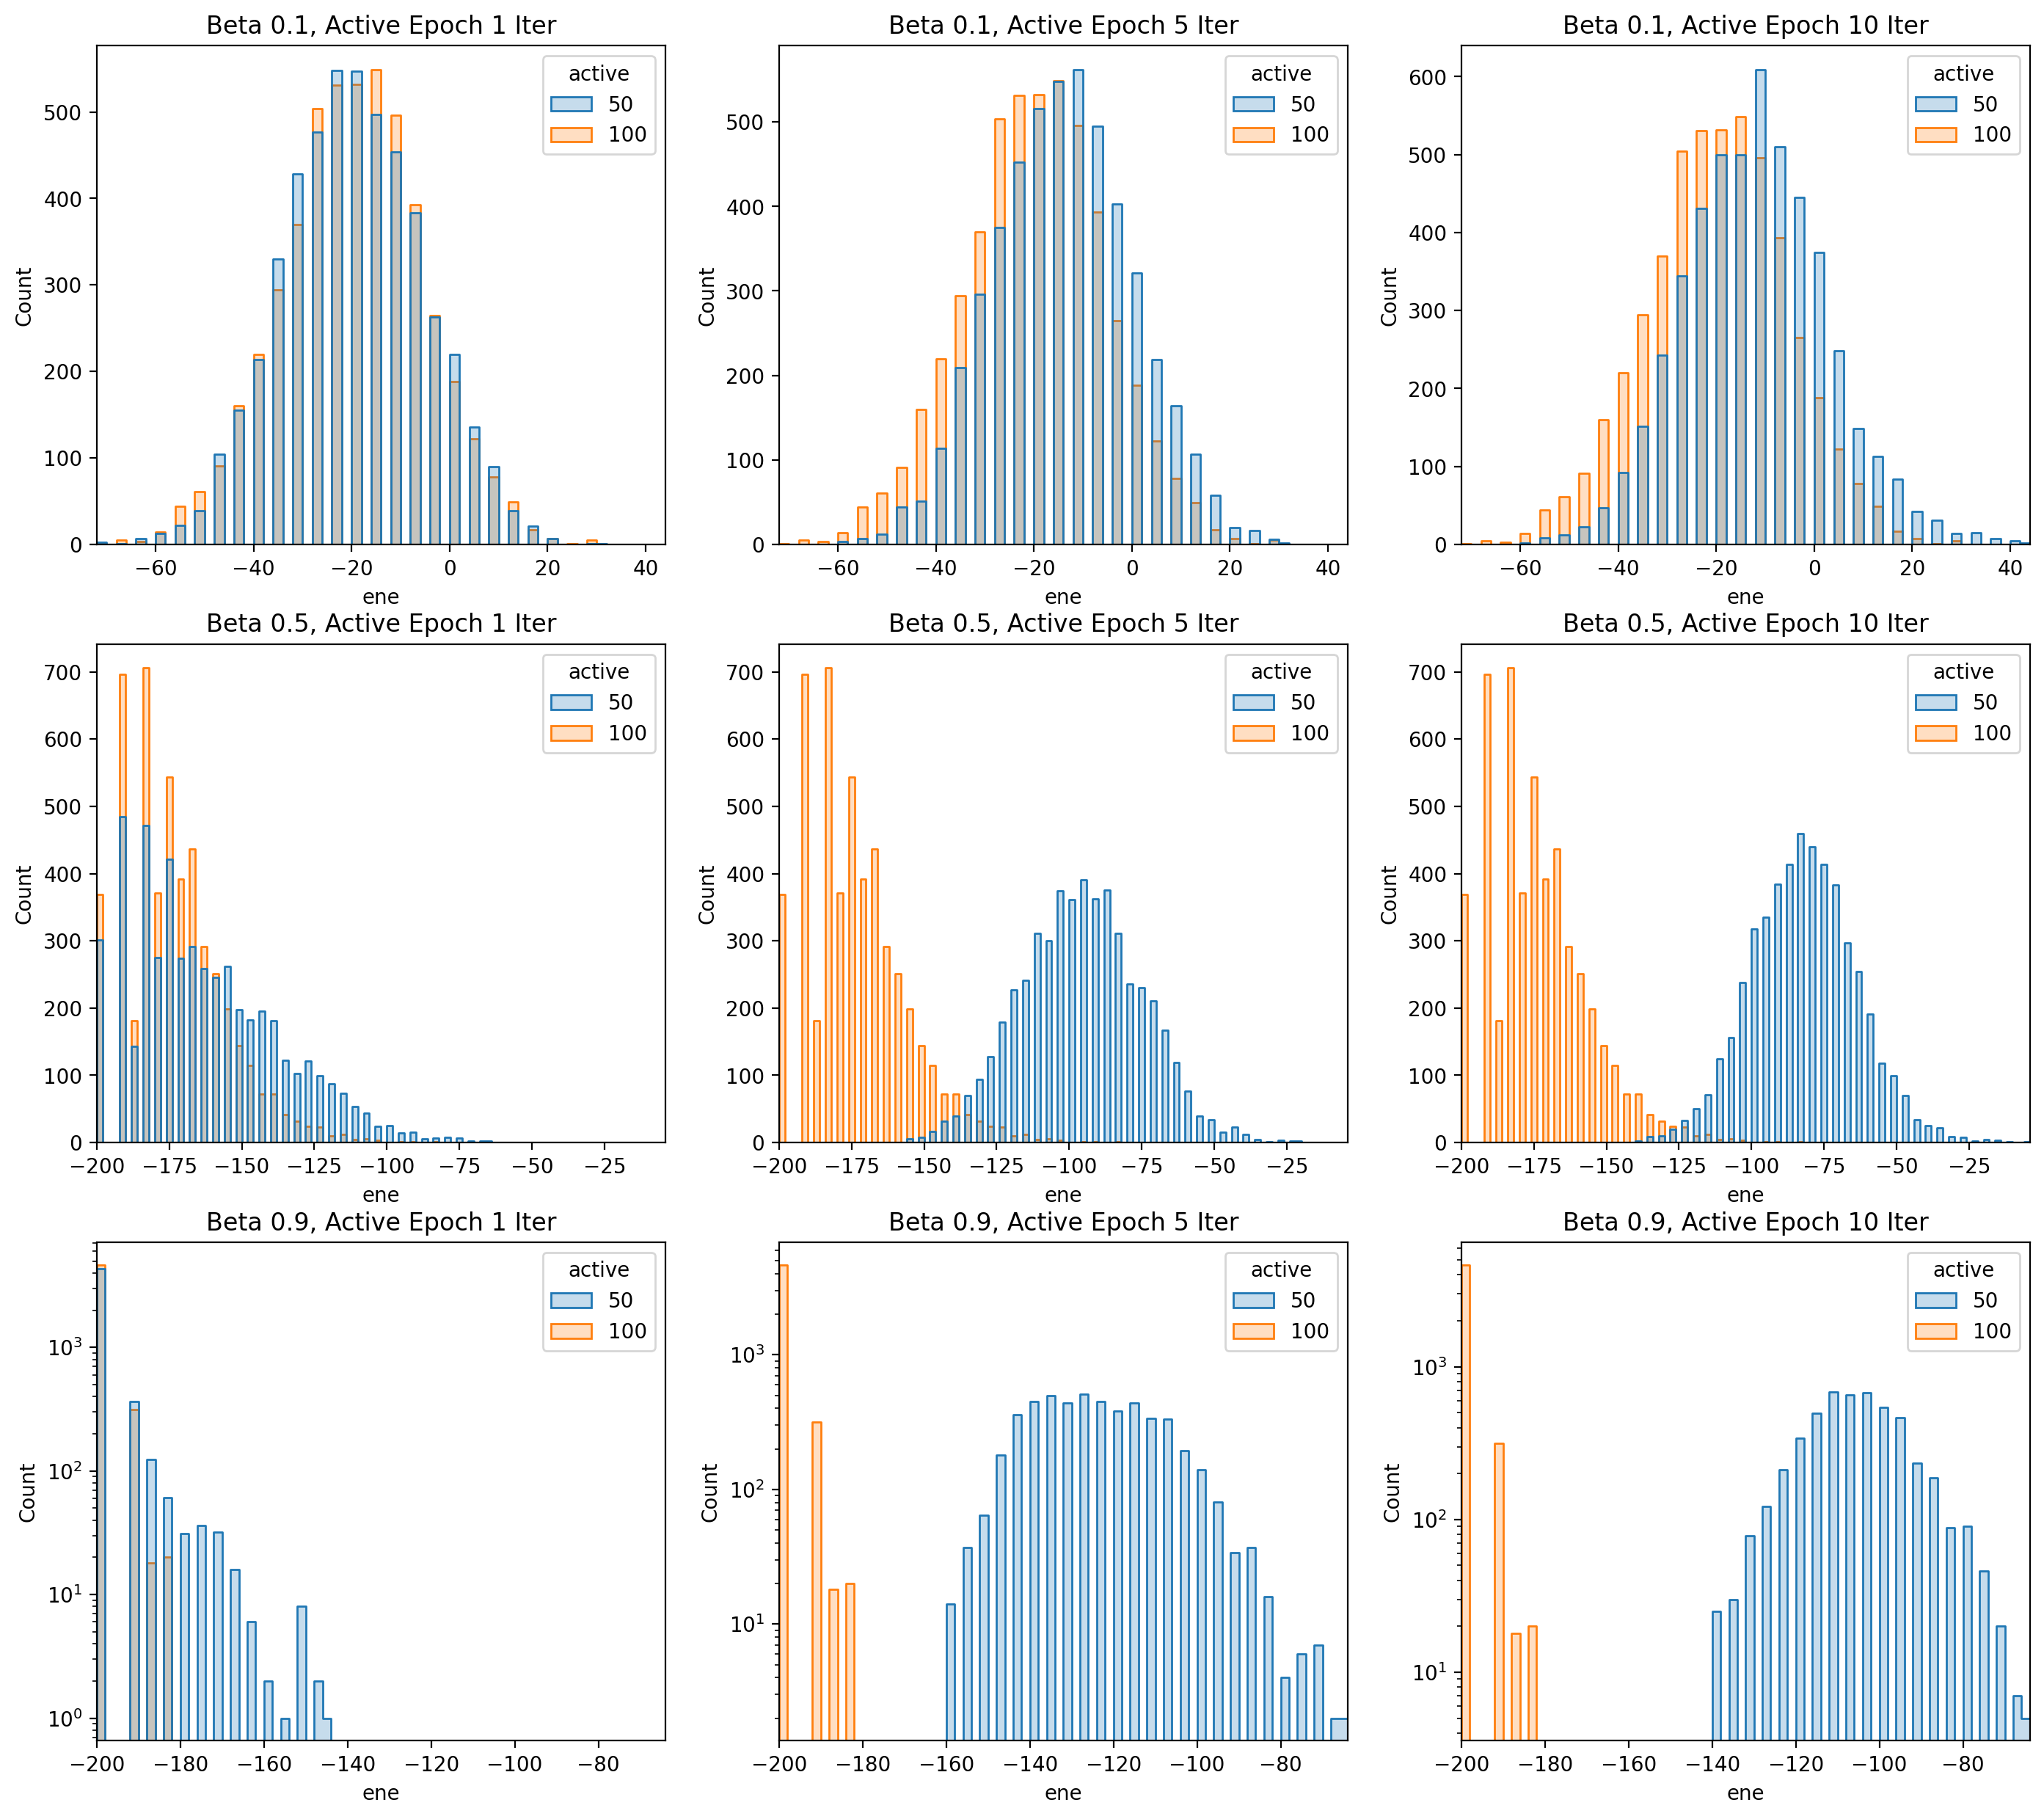

In [151]:
plot_distributions(part_150)

In [114]:
for beta in [0.1, 0.5, 0.9]:
    print(np.sqrt(np.mean(fulldf[beta]['M'])), np.sqrt(np.mean(partdf[beta][1]['M'])), np.sqrt(np.mean(partdf[beta][5]['M'])), np.sqrt(np.mean(partdf[beta][10]['M'])))

0.12490504200087912 0.12537842084582615 0.12483451335323065 0.1252855089729881
0.915327763869503 0.9148815457525746 0.9163402786120975 0.9132690721079771
0.9983388470440492 0.998346515477225 0.99827257006187 0.9983424603501201


In [115]:
for beta in [0.1, 0.5, 0.9]:
    print(np.sqrt(np.mean(fulldf[beta]['M'])), np.sqrt(np.mean(partdf[beta][1]['M'])), np.sqrt(np.mean(partdf[beta][5]['M'])), np.sqrt(np.mean(partdf[beta][10]['M'])))

0.12490504200087912 0.12537842084582615 0.12483451335323065 0.1252855089729881
0.915327763869503 0.9148815457525746 0.9163402786120975 0.9132690721079771
0.9983388470440492 0.998346515477225 0.99827257006187 0.9983424603501201


In [1]:
import re
import pandas as pd

In [6]:
qa_bad = pd.read_csv('../qa_3_data.csv')

In [42]:
qa_bad['Best'] = qa_bad[['SPS','SA','Bee', 'Evolution']].min(axis=1)
qa_bad['SPS Performance'] = qa_bad['Best'] / qa_bad['SPS']
qa_bad

,Problem,Type,Deliveries,SPS,SA,Bee,Evolution,SPS Performance,Best
0,clustered1-1,Average,57,69850,66379,60876,48923,0.700401,48923
1,clustered1-1,Best,57,69080,52119,56358,48152,0.697047,48152
2,clustered1-2,Average,55,77173,74341,81438,54719,0.709043,54719
3,clustered1-2,Best,55,75530,59947,68772,53490,0.708195,53490
4,group1-1,Average,42,158919,156217,153495,137989,0.868298,137989
5,group1-1,Best,42,155388,146526,142774,135593,0.872609,135593
6,group1-2,Average,54,171732,145380,145325,137626,0.801400,137626
7,group1-2,Best,54,165043,141065,140947,136307,0.825888,136307
8,range-6-1,Average,47,71670,68003,67234,59937,0.836291,59937
9,range-6-1,Best,47,68459,62312,64404,59827,0.873910,59827


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, '')]

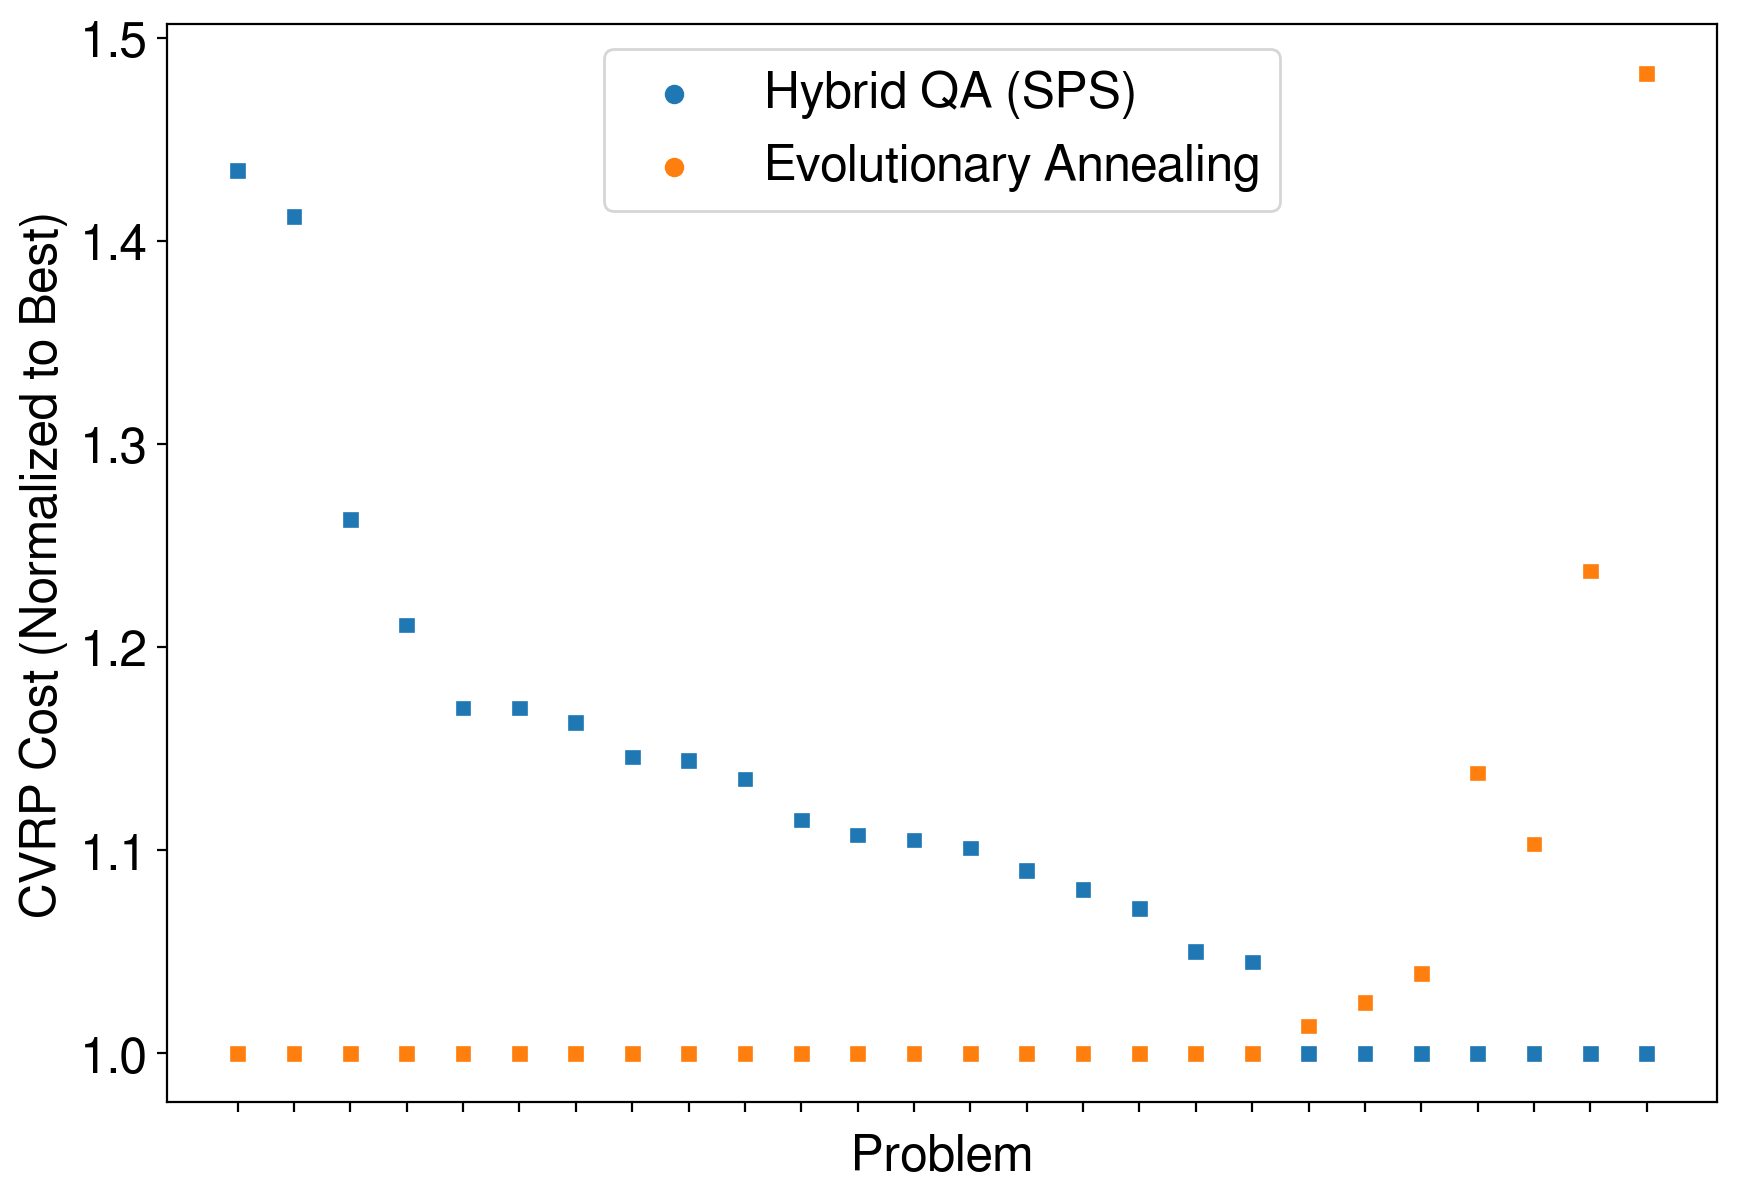

In [59]:

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'FreeSans'
fig, ax = plt.subplots(figsize=(10,7), dpi=200)
best_df = qa_bad.query('Type==\'Best\'').reset_index(drop=True).sort_values(by='SPS Performance').rename(columns={'SPS': 'Hybrid QA (SPS)', 'Evolution': 'Evolutionary Annealing'})
randind = np.random.choice(np.arange(len(best_df)), 10)
plt_df = best_df.melt(id_vars=['Problem', 'Best'], value_vars=['Hybrid QA (SPS)', 'Evolutionary Annealing'])
plt_df['value'] = plt_df['value'] / plt_df['Best']
sns.scatterplot(ax=ax, data=plt_df, x='Problem', y='value', hue='variable', marker='s')
ax.legend_.set_title(None)
ax.set_ylabel('CVRP Cost (Normalized to Best)')
ax.set_xticklabels([])

In [30]:
best_df.iloc[randind]

,Problem,Type,Deliveries,SPS,SA,Bee,Evolution
7,range-8-12-2,Best,50,143598,135493,136776,128803
8,range-8-12-3,Best,46,101577,99004,94423,91921
19,range-4-100-2,Best,50,88566,97312,111513,84750
13,range-5-2,Best,50,76868,67958,67780,67716
0,clustered1-1,Best,57,69080,52119,56358,48152
24,range-4-75-1,Best,50,60283,56337,62051,51846
17,range-4-2,Best,50,18044,18498,18497,18498
18,range-4-100-1,Best,50,81303,98522,112389,84514
0,clustered1-1,Best,57,69080,52119,56358,48152
19,range-4-100-2,Best,50,88566,97312,111513,84750


In [1]:
s = {0, 10, 9, 1, 90, 80, 99, 91, 92, 81, 71, 82, 83, 72, 73, 62, 61, 52, 63, 64, 53, 54, 43, 44, 42, 33, 23, 34, 32, 31, 22, 12, 21, 20, 29, 30, 39, 40, 50, 41, 51, 5, 4, 15, 74, 16,
  75, 14, 13, 3, 25, 84, 24, 93, 35, 94, 26, 85, 27, 86, 2, 89, 11, 70, 98, 88, 7, 66, 36, 95, 37, 96, 8, 67, 19, 78, 17, 76, 18, 77, 28, 87, 38, 97, 6, 65, 45, 55, 46, 56, 47, 57, 68, 60, 79, 69, 58, 59, 48, 49}

100

In [67]:
df = pd.read_csv('../limspins.csv')
df

,epoch,beta,ene,state
0,999,3,-112,1 -1 1 1 -1 -1 1 -1 -1 1 1 -1 1 -1 -1 -1 -1 1 ...
1,1998,3,-112,1 -1 1 1 -1 1 1 -1 -1 1 1 -1 1 -1 -1 -1 -1 1 1...
2,2997,3,-110,1 -1 1 1 -1 -1 1 -1 -1 1 1 -1 1 -1 -1 -1 -1 1 ...
3,3996,3,-112,1 -1 1 1 -1 1 1 -1 -1 1 1 -1 1 -1 -1 -1 -1 1 1...
4,4995,3,-112,1 -1 1 1 -1 -1 1 -1 -1 1 1 -1 1 -1 -1 -1 -1 1 ...
...,...,...,...,...
996,6102,3,-204,-1 1 1 -1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
997,7101,3,-204,1 1 1 -1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...
998,8100,3,-204,-1 1 1 -1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
999,9099,3,-204,1 1 1 -1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...


In [68]:
colnames = [f's{i}' for i in range(120)]

df= pd.concat([df,df['state'].str.split(expand=True)], axis=1)

In [69]:
df = df.rename(columns=dict(enumerate(colnames)))

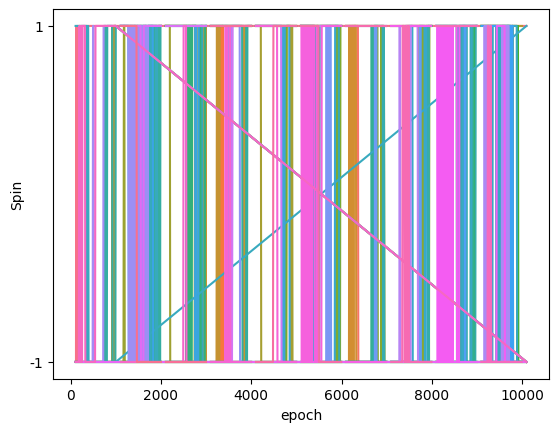

In [70]:
limnames = [f's{i}' for i in range(120)]
test = df[['epoch'] + limnames].melt(id_vars='epoch', value_vars=limnames, value_name='Spin')
ax=sns.lineplot(data=test[::10], x='epoch', y='Spin', hue='variable')
ax.legend_ = None
plt.show()

In [60]:
df = pd.read_csv('../spins.csv')
df

,epoch,beta,ene,state
0,9,3,-216,1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -...
1,18,3,-218,1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -...
2,27,3,-218,1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -...
3,36,3,-218,1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -...
4,45,3,-218,1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -...
...,...,...,...,...
1106,9963,3,-220,-1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 1 ...
1107,9972,3,-220,-1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 1 ...
1108,9981,3,-220,-1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 1 ...
1109,9990,3,-220,1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 -1 1 -...


In [61]:
colnames = [f's{i}' for i in range(120)]

df= pd.concat([df,df['state'].str.split(expand=True)], axis=1)

In [62]:
df = df.rename(columns=dict(enumerate(colnames)))

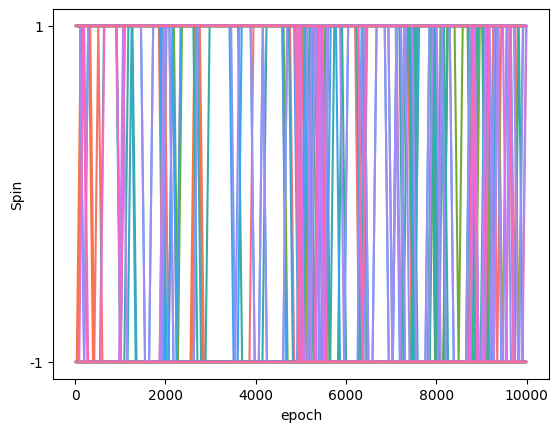

In [64]:
limnames = [f's{i}' for i in range(120)]
test = df[['epoch'] + limnames].melt(id_vars='epoch', value_vars=limnames, value_name='Spin')
ax=sns.lineplot(data=test[::10], x='epoch', y='Spin', hue='variable')
ax.legend_ = None
plt.show()

In [87]:
winlog = pd.read_csv('../windowlog.csv')
blocklog = pd.read_csv('../blocklog.csv')
wholelog = pd.read_csv('../wholelog.csv')
winlog['epoch'] = (winlog['epoch'] / 120).round().astype(int)
blocklog['epoch'] = (blocklog['epoch'] / 4).round().astype(int)
winlog['Type'] = 'Window'
blocklog['Type'] = 'Block'
wholelog['Type'] = 'Univariate'
main_df = pd.concat([winlog.groupby('epoch').mean(), blocklog, wholelog])

KeyboardInterrupt: 

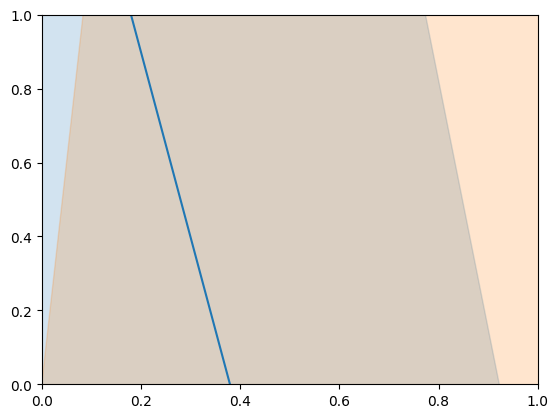

In [89]:
sns.lineplot(data=main_df, x='epoch', y='ene', hue='Type')
plt.show()

In [84]:
blocklog

,epoch,beta,M,ene
0,0,0.010000,0.022500,-10
1,0,0.010000,0.006944,0
2,0,0.010000,0.017778,-4
3,1,0.022004,0.006944,12
4,1,0.022004,0.004444,-14
...,...,...,...,...
1995,499,6.000000,0.017778,-222
1996,499,6.000000,0.017778,-222
1997,499,6.000000,0.017778,-222
1998,500,6.000000,0.017778,-222


In [85]:
wholelog

,epoch,beta,M,ene
0,0,0.012996,0.010000,8
1,1,0.015993,0.013611,8
2,2,0.018989,0.010000,-12
3,3,0.021986,0.013611,-2
4,4,0.024983,0.017778,-2
...,...,...,...,...
1995,1995,5.991010,0.022500,-222
1996,1996,5.994010,0.027778,-222
1997,1997,5.997000,0.027778,-222
1998,1998,6.000000,0.027778,-222
